In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
# Ghazanfar Ali
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
# Ghazanfar Ali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


/tmp/ipykernel_20/362569497.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'], color='b', bins=100, hist_kws={'alpha': 0.4});


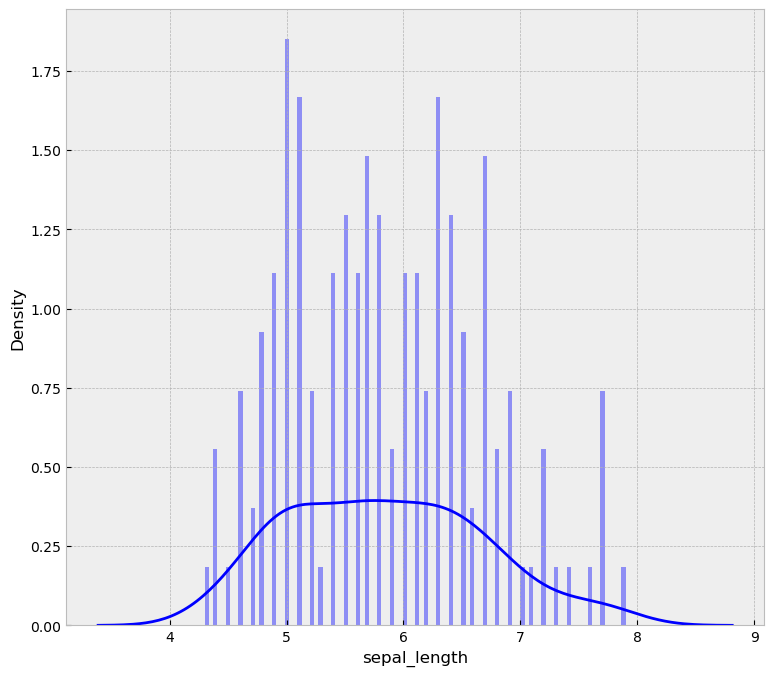

In [4]:
print(df['sepal_length'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['sepal_length'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [5]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,id,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


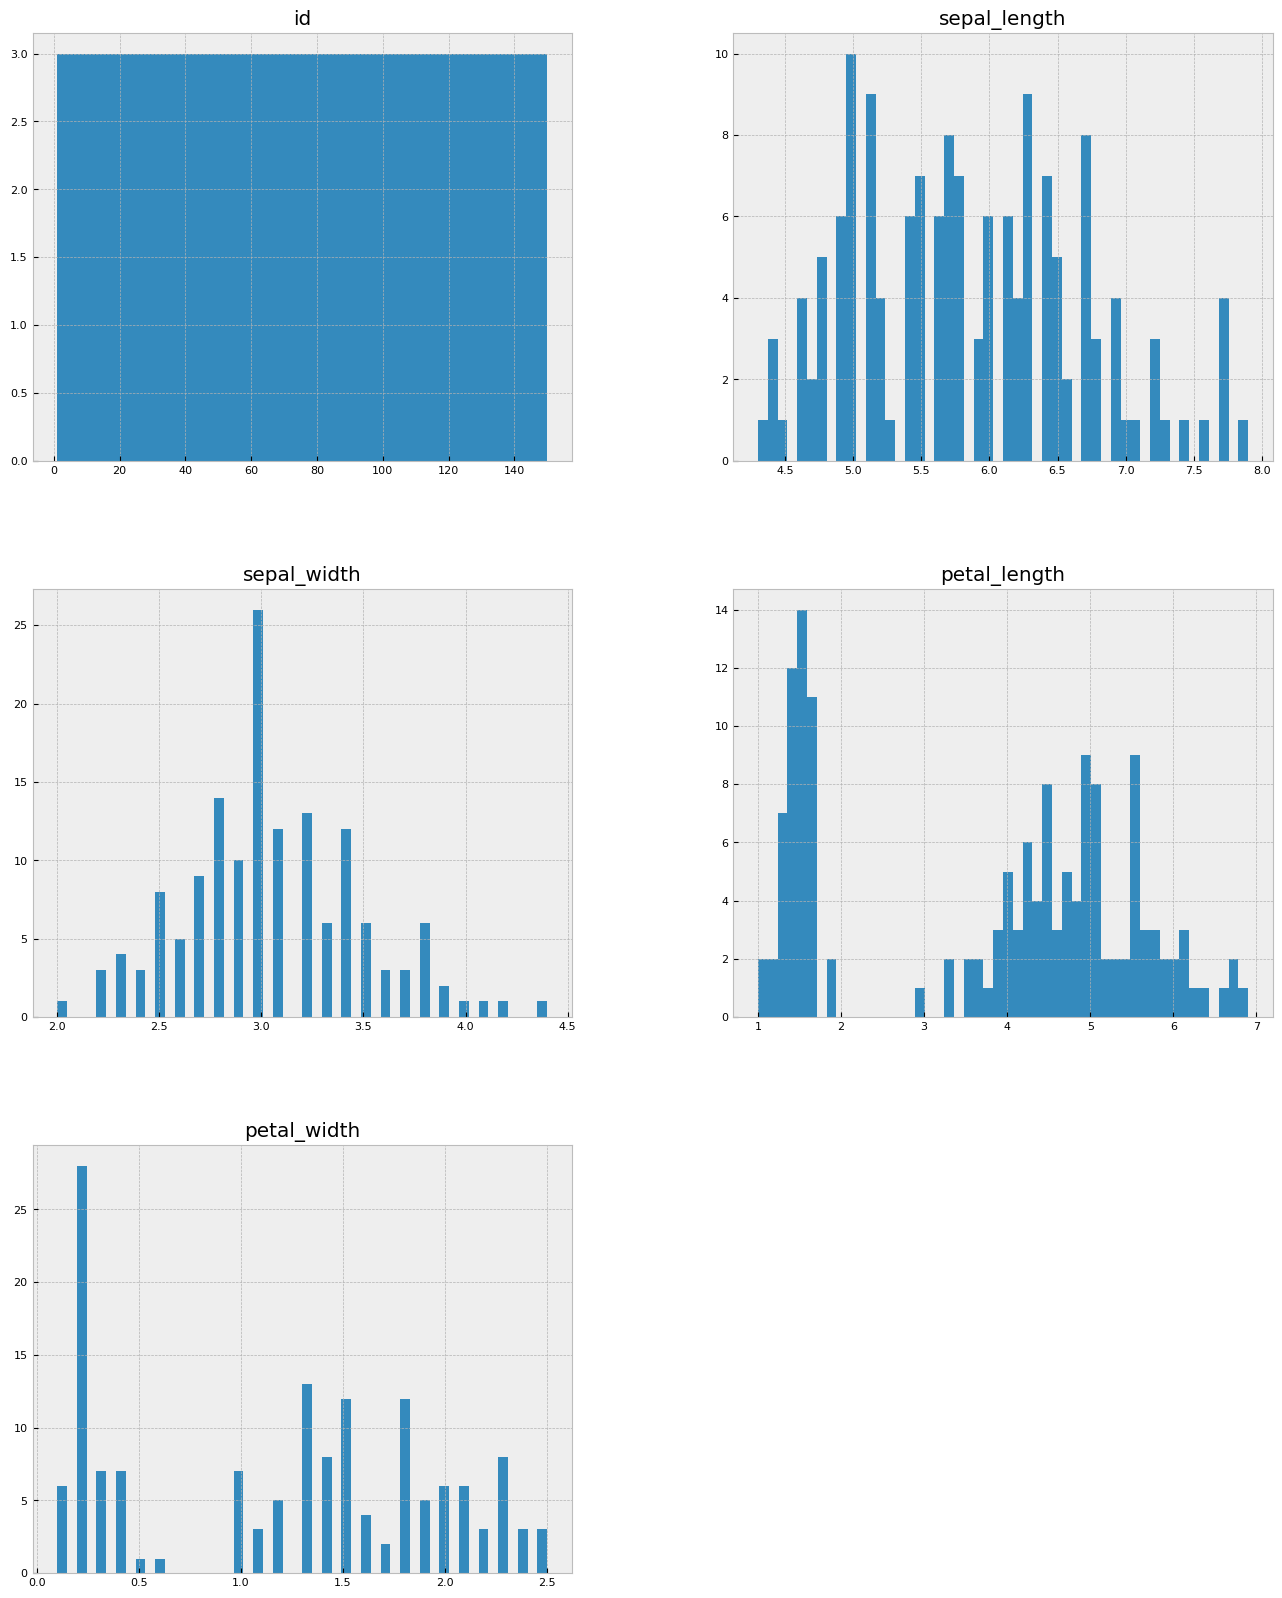

In [7]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
df_num_corr = df_num.corr()['sepal_length'][:-1] # -1 because the latest row is Sepal length
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Sepal length:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with Sepal length:
sepal_length    1.000000
petal_length    0.871754
id              0.716676
Name: sepal_length, dtype: float64


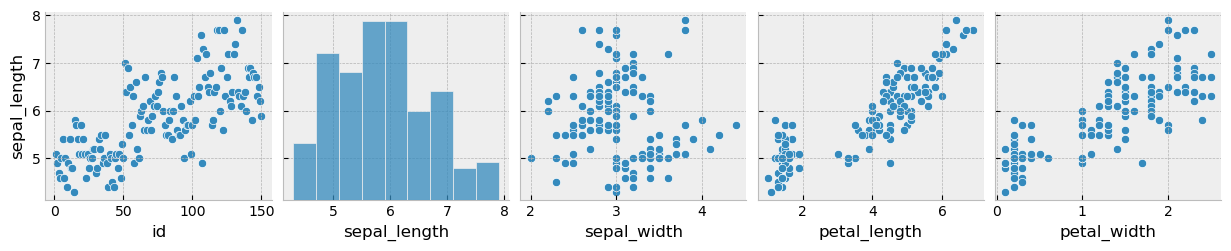

In [9]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['sepal_length'])

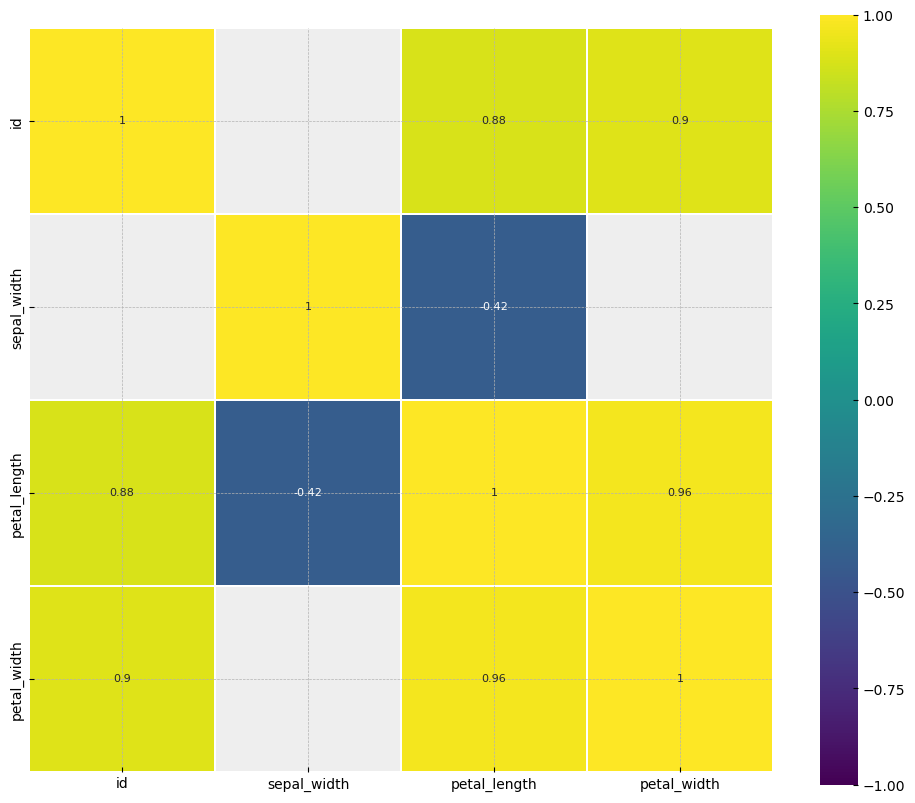

In [10]:
corr = df_num.drop('sepal_length', axis=1).corr() # We already examined sepal length correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [11]:
quantitative_features_list = ['id', 'sepal_width', 'petal_length', 'petal_width', 'sepal_length']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,id,sepal_width,petal_length,petal_width,sepal_length
0,1,3.5,1.4,0.2,5.1
1,2,3.0,1.4,0.2,4.9
2,3,3.2,1.3,0.2,4.7
3,4,3.1,1.5,0.2,4.6
4,5,3.6,1.4,0.2,5.0


In [12]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('sepal_length')
features_to_analyse

['id', 'petal_length', 'sepal_length', 'sepal_length']